# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Image
from scipy.stats import pearsonr
import seaborn as sns
import math
from sklearn.metrics import r2_score
from multiprocessing import Pool

# Import data

The experimental data records the relative barcode frequency for each barcodes across all the transplantation samples.

In [2]:
experiment = pd.read_excel("Table_1_experimental_clonal_size.xlsx")

In [3]:
experiment.head()

,Barcode,(1)719 Ipsi,(1)719 Contra,"(1,1V)719 Ipsi","(1,1V)719 Contra","(1,2V)719 Ipsi","(1,2V)719 Contra","(1,3V)719 Ipsi","(1,3V)719 Contra","(1,1T)719 Ipsi",...,"(1,1T,1V)719 Ipsi","(1,1T,1V)719 Contra","(1,1T,2V)719 Ipsi","(1,1T,2V)719 Contra","(1,1T,1T)719 Ipsi","(1,1T,1T)719 Contra","(1,1T,2T)719 Ipsi","(1,1T,2T)719 Contra","(1,1T,3T)719 Ipsi","(1,1T,3T)719 Contra"
0,AAATCAAGATCGAAACTGGTCAAACTG,0.001608,0.000614,0.002460,0.002479,0.002866,0.001103,0.004939,0.006328,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.005538,0.0,0.0,0.003078
1,AAATCAGGATGCAAACAGGTGTAACGG,0.001913,0.002575,0.003878,0.004407,0.003090,0.003762,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,AAATCCAGATCGAAATGGGTTTAACTT,0.002520,0.000000,0.005109,0.003288,0.005141,0.000000,0.002147,0.002167,0.00199,...,0.000000,0.0,0.003741,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,AAATCCAGATGGAAAGAGGTAGAACCC,0.001200,0.000743,0.001532,0.001386,0.002106,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,AAATCTCGATGGAAATCGGTCAAACAA,0.002975,0.001134,0.004104,0.002142,0.009155,0.001001,0.009424,0.010710,0.00199,...,0.002222,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [4]:
np.shape(experiment)

(2070, 39)

In [5]:
passage = experiment.columns

In [6]:
passage[1:]

Index(['(1)719 Ipsi', '(1)719 Contra', '(1,1V)719 Ipsi', '(1,1V)719 Contra',
       '(1,2V)719 Ipsi', '(1,2V)719 Contra', '(1,3V)719 Ipsi',
       '(1,3V)719 Contra', '(1,1T)719 Ipsi', '(1,1T)719 Contra',
       '(1,2T)719 Ipsi', '(1,2T)719 Contra', '(1C,1)719 Ipsi',
       '(1C,1)719 Contra', '(1C,2)719 Ipsi', '(1C,2)719 Contra',
       '(1,2V,1)719 Ipsi', '(1,2V,1)719 Contra', '(1,2V,2)719 Ipsi',
       '(1,2V,2)719 Contra', '(1,2V,3)719 Ipsi', '(1,2V,3)719 Contra',
       '(1,3V,1V)719 Ipsi', '(1,3V,1V)719 Contra', '(1,3V,2V)719 Ipsi',
       '(1,3V,2V)719 Contra', '(1,3V,1T)719 Ipsi', '(1,3V,1T)719 Contra',
       '(1,1T,1V)719 Ipsi', '(1,1T,1V)719 Contra', '(1,1T,2V)719 Ipsi',
       '(1,1T,2V)719 Contra', '(1,1T,1T)719 Ipsi', '(1,1T,1T)719 Contra',
       '(1,1T,2T)719 Ipsi', '(1,1T,2T)719 Contra', '(1,1T,3T)719 Ipsi',
       '(1,1T,3T)719 Contra'],
      dtype='object')

In [7]:
primary = np.vstack([experiment["(1)719 Ipsi"], experiment["(1)719 Contra"]])
secondary = np.vstack([
#     experiment["(1,1V)719 Ipsi"], experiment["(1,1V)719 Contra"],
                       experiment["(1,2V)719 Ipsi"], experiment["(1,2V)719 Contra"],
#                        experiment["(1,3V)719 Ipsi"], experiment["(1,3V)719 Contra"],
#                        experiment["(1,1T)719 Ipsi"], experiment["(1,1T)719 Contra"],
#                        experiment["(1,2T)719 Ipsi"], experiment["(1,2T)719 Contra"],
#                        experiment["(1C,1)719 Ipsi"], experiment["(1C,1)719 Contra"],
#                        experiment["(1C,2)719 Ipsi"], experiment["(1C,2)719 Contra"]
                      ])
tertiary = np.vstack([experiment["(1,2V,1)719 Ipsi"], experiment["(1,2V,1)719 Contra"]
#                       ,experiment["(1,2V,2)719 Ipsi"], experiment["(1,2V,2)719 Contra"],
#                       experiment["(1,2V,3)719 Ipsi"], experiment["(1,2V,3)719 Contra"],
#                       experiment["(1,3V,1V)719 Ipsi"], experiment["(1,3V,1V)719 Contra"],
#                       experiment["(1,3V,2V)719 Ipsi"], experiment["(1,3V,2V)719 Contra"],
#                       experiment["(1,3V,1T)719 Ipsi"], experiment["(1,3V,1T)719 Contra"],
#                       experiment["(1,1T,1V)719 Ipsi"], experiment["(1,1T,1V)719 Contra"],
#                       experiment["(1,1T,2V)719 Ipsi"], experiment["(1,1T,2V)719 Contra"],
#                       experiment["(1,1T,1T)719 Ipsi"], experiment["(1,1T,1T)719 Contra"],
#                       experiment["(1,1T,2T)719 Ipsi"], experiment["(1,1T,2T)719 Contra"],
#                       experiment["(1,1T,3T)719 Ipsi"], experiment["(1,1T,3T)719 Contra"]
                     ])


In [8]:
# plt.hist(primary[0], label = "Ipsi", alpha = 0.4)
# plt.hist(primary[1], label = "Contra", alpha = 0.4)
# plt.legend()

# Clone size correlation cross passage

In [9]:
# c12 = np.zeros([len(primary), len(secondary)])
# for p in range(len(primary)):
#     for s in range(len(secondary)):
#         c12[p][s],_ = pearsonr(primary[p], secondary[s])

# c13 = np.zeros([len(primary), len(tertiary)])
# for p in range(len(primary)):
#     for t in range(len(tertiary)):
#         c13[p][t],_ = pearsonr(primary[p], tertiary[t])
        
# c23 = np.zeros([len(secondary), len(tertiary)])
# for s in range(len(secondary)):
#     for t in range(len(tertiary)):
#         c23[s][t],_ = pearsonr(secondary[s], tertiary[t])

# C12 = np.asarray(c12).reshape(-1)
# C13 = np.asarray(c13).reshape(-1)
# C23 = np.asarray(c23).reshape(-1)

# data = pd.DataFrame({"passage": 
#                      np.append(np.append(
#                          np.repeat("c12",len(C12)),
#                                                     np.repeat("c13",len(C13))),
#                                           np.repeat("c23",len(C23))),
#                      "correlation": 
#                      np.append(np.append(
#                          C12,
#                                                         C13),
#                                               C23)
#                     })

# sim = pd.DataFrame({"passage":["c12", "c13", "c23"],
#                    "correlation":[0.615, 0.468, 0.83]})

# sns.violinplot(x="passage",y="correlation",data=data)
# sns.pointplot(x="passage",y="correlation",data=sim,color="yellow")

# Binning for relative barcode frequency

In Lan et al., the barcode frequency distribution h(x) with x being the relative barcode frequency are generated by binning the experimentally obtained barcode frequencies with a binsize of (max(x) - min(x))/100.

In [10]:
def binnedCloneSizeDistribution(cloneSize):
    binnedCloneSize = np.zeros((2,100))
    binSize = (max(cloneSize) - min(cloneSize))/100
    for B in range(100):
        index = np.all([[min(cloneSize) + binSize*B < cloneSize], [min(cloneSize) + binSize*(B+1) >= cloneSize]], axis = 0)
        binnedCloneSize[0][B] = min(cloneSize) + binSize*(B+0.5)
        binnedCloneSize[1][B] = sum(index[0])
    binnedCloneSize[1][:] = binnedCloneSize[1]/sum(binnedCloneSize[1])
    return(binnedCloneSize)

# primaryBinned = np.array([binnedCloneSizeDistribution(i) for i in primary])
# secondaryBinned = np.array([binnedCloneSizeDistribution(i) for i in secondary])
# tertiaryBinned = np.array([binnedCloneSizeDistribution(i) for i in tertiary])

In [11]:
# plt.plot(primaryBinned[0][0],primaryBinned[0][1], label = "Ipsi")
# plt.plot(primaryBinned[1][0],primaryBinned[1][1], label = "Contra")
# plt.title("primary")
# plt.legend()

In [12]:
# plt.plot(secondaryBinned[0][0],secondaryBinned[0][1], label = "replicate")
# plt.plot(secondaryBinned[1][0],secondaryBinned[1][1], label = "replicate")
# plt.title("secondary")
# plt.legend()

In [13]:
# plt.plot(tertiaryBinned[0][0],tertiaryBinned[0][1], label = "replicate")
# plt.plot(tertiaryBinned[1][0],tertiaryBinned[1][1], label = "replicate")
# plt.title("tertiary")
# plt.legend()

# Check negative binomial distribution using first incomplete moment

In [14]:
def firstIncompleteMomentUsingCloneSize(cloneSizes):
    cloneSizes = np.array(cloneSizes)
    averageCloneSize = np.mean(cloneSizes)
    cloneSizeRange = np.unique(cloneSizes)
    freq = np.array([(list(cloneSizes).count(i)/len(cloneSizes)) for i in cloneSizeRange])
    cloneProb = np.array([(size*prob) for (size, prob) in zip(cloneSizeRange, freq)])
    mu = np.zeros(len(cloneProb))
    for i in range(len(cloneProb)):
        mu[i]= sum(cloneProb[i:])/averageCloneSize
    return(mu)

def firstIncompleteMomentUsingFrequency(frequency):
    cloneProb = np.array([(f*i) for (i,f) in enumerate(frequency)])/sum(frequency)
    averageCloneSize = sum(cloneProb)
    cloneSizeRange = range(len(frequency))
    mu = np.zeros(len(cloneProb))
    for i in range(len(cloneProb)):
        mu[i]= sum(cloneProb[i:])/averageCloneSize
    return(mu)

# def logPlot(X,y):
#     Y = np.log(y)
#     plt.plot(X,Y,'b')
#     plt.plot(X, np.poly1d(np.polyfit(X, Y, 1))(X),'r')
#     plt.xlabel('clone size')
#     plt.ylabel('log first incomplete moment')


In [15]:
# primaryBinnedMuIpsi = firstIncompleteMomentUsingFrequency(primaryBinned[0][1])
# YIpsi = np.array([math.log(i) for i in primaryBinnedMuIpsi])
# XIpsi = primaryBinned[0][0]

# primaryBinnedMuCon = firstIncompleteMomentUsingFrequency(primaryBinned[1][1])
# YCon = np.array([math.log(i) for i in primaryBinnedMuCon])
# XCon = primaryBinned[1][0]

In [16]:
# plt.plot(XIpsi, YIpsi, label = "Ipsi", color = "r")
# plt.plot(XIpsi, np.poly1d(np.polyfit(XIpsi, YIpsi, 1))(XIpsi), linestyle = "dashed", color = "r")
# plt.plot(XCon, YCon, label = "Contra", color = "b")
# plt.plot(XCon, np.poly1d(np.polyfit(XCon, YCon, 1))(XCon), linestyle = "dashed", color = "b")
# plt.legend()

# Barcode survival probability

n0 is the characteristic barcode frequency, and it could be measured from the slope of the plot of first incomplete moment.

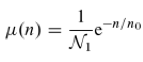

In [17]:
Image("first_incomplete_moment.png")

In [18]:
def searchn0(frequency):
    mu = firstIncompleteMomentUsingFrequency(frequency[1])
    index = mu > 0
    y = mu[index]
    Y = np.array([math.log(i) for i in y])
    X = frequency[0][index]
    k,_,_,_,_=stats.linregress(X,Y)
    return(-1/k)


In [34]:
primaryClone = np.array([np.mean(i) for i in np.transpose(primary)])
secondaryClone = np.array([np.mean(i) for i in np.transpose(secondary)])
tertiaryClone = np.array([np.mean(i) for i in np.transpose(tertiary)])

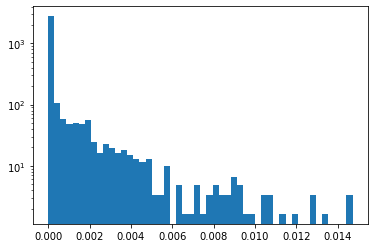

In [65]:
plt.hist(tertiaryClone, bins = 50, density = True)
# plt.title("distribution of experimental barcode frequency")
plt.yscale('log')

In [20]:
def binnedPassageCloneSizeDistribution(cloneSize):
    binnedCloneSize = np.zeros((2,100))
    binSize = (max(cloneSize) - min(cloneSize))/100
    for B in range(100):
        index = np.all([[min(cloneSize) + binSize*B < cloneSize], [min(cloneSize) + binSize*(B+1) >= cloneSize]], axis = 0)
        binnedCloneSize[0][B] = min(cloneSize) + binSize*(B+0.5)
        binnedCloneSize[1][B] = sum(index[0])
    return(binnedCloneSize)

def survivalUsingCloneSize(cloneSize, n0, fraction, cellNumber):
    index = np.where(cloneSize > n0*fraction)
    survival = len(index[0])/cellNumber
    return(survival*100)

def survivalUsingfrequency(frequency, n0, fraction, cellNumber):
    survival = sum(frequency[1][frequency[0]>n0*fraction])/cellNumber
    return(survival*100)


According to Lan et al., since the detection threshold from sequencing may distort the distribution for small barcode frequencies, the barcode frequency distribution are truncated from below (within the first 20 data points) such that the coefficient of determination of the fit is maximised. Here, we are determining the n, the data point up to which the barcode frequency distrinbution are truncated.

In [21]:
def searchN(n):
    barFreq = tertiaryClone    
    binnedBarFreq = binnedPassageCloneSizeDistribution(barFreq)
    truncatedBinBarFreq = np.array([i[n:] for i in binnedBarFreq])
    n0 = searchn0(truncatedBinBarFreq)   
    mu = firstIncompleteMomentUsingFrequency(truncatedBinBarFreq[1])
    index = mu > 0
    y = mu[index]
    Y = np.array([math.log(i) for i in y])
    X = truncatedBinBarFreq[0][index]
    r2 = r2_score(Y, X)
    return(np.array([n0, r2]))

# n = np.array(range(20))

# if __name__ == '__main__':
#     with Pool(8) as p:
#         %time truncatedBarFreqResult = p.map(searchN, n)

In [22]:
# result = pd.DataFrame(truncatedBarFreqResult, columns = ["n0", "r2"])
# result

In [23]:
# result.iloc[(np.where(result["r2"] == max(result["r2"]))[0])]

In [24]:
cellNumber = np.array([125000, 300000, 300000])

# primaryBinBarFreq = binnedPassageCloneSizeDistribution(primaryClone)
# secondaryBinBarFreq = binnedPassageCloneSizeDistribution(secondaryClone)
# tertiaryBinBarFreq = binnedPassageCloneSizeDistribution(tertiaryClone)

# n0p = 0.003797
# n0s = 0.007684
# n0t = 0.00829

# # surv = pd.DataFrame({"passage":["primary","secondary","tertiary"],
# #                      "survival (%)":[survivalUsingCloneSize(primaryClone, n0p, 0.5, cellNumber[0]),
# #                 survivalUsingCloneSize(secondaryClone, n0s, 0.5, cellNumber[1]),
# #                 survivalUsingCloneSize(tertiaryClone, n0t, 0.5, cellNumber[2])]})

# surv = pd.DataFrame({"passage":["primary","secondary","tertiary"],
#                      "survival (%)":[survivalUsingfrequency(primaryBinBarFreq, n0p, 0.5, cellNumber[0]) ,
#                 survivalUsingfrequency(secondaryBinBarFreq, n0s, 0.5, cellNumber[1]),
#                 survivalUsingfrequency(tertiaryBinBarFreq, n0t, 0.5, cellNumber[2])]})


In [25]:
# surv

In [26]:
# simSurv = pd.DataFrame({"passage":["primary", "secondary", "tertiary"],
#                    "survival (%)":[0.176, 0.122, 0.097]})

In [27]:
# survPlot=sns.violinplot(x="passage",y="survival (%)",data=surv)
# sns.pointplot(x="passage",y="survival (%)",data=simSurv,color="yellow")
# # survPlot.set(ylim=(0,0.1))